In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft, fftfreq

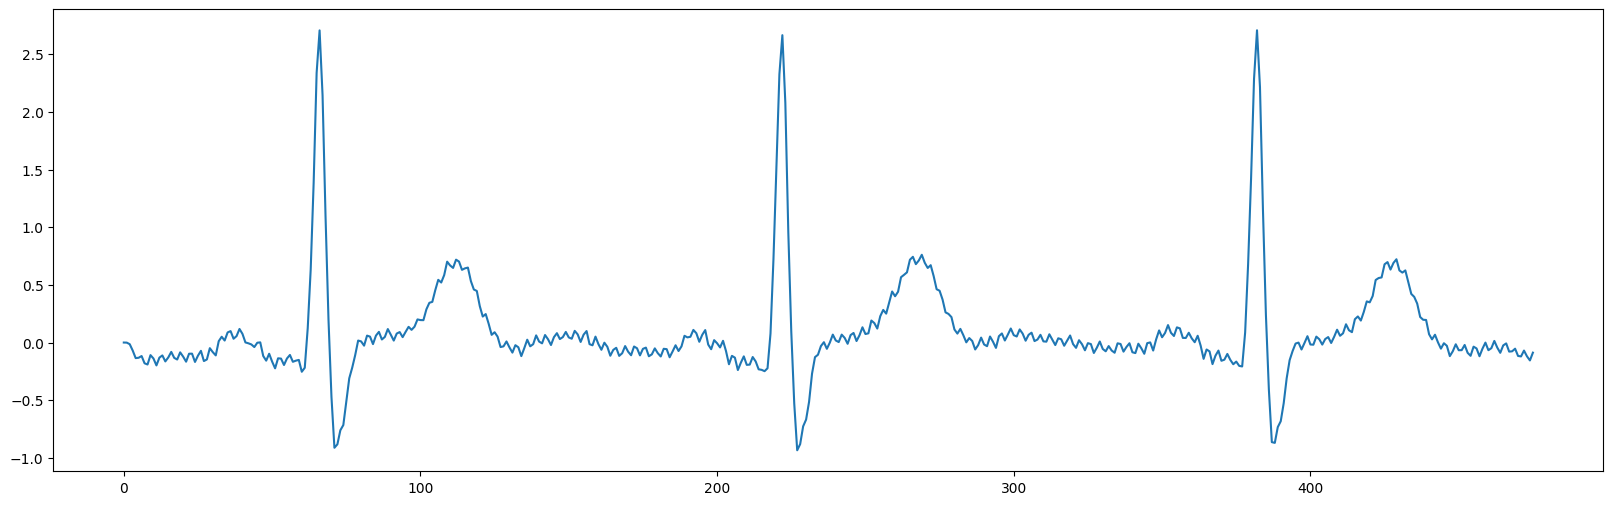

In [3]:


# Read Data from DAT file
file_path = '../Data/ECG1.dat'

# Initialize an empty list to store the read float data.
ECG_data_1 = []

# Open the DAT file and read its contents.
try:
    with open(file_path, 'r') as file:
        for line in file:
            values = line.strip().split()
            for value in values:
                try:
                    float_value = float(value)
                    ECG_data_1.append(float_value)
                except ValueError:
                    print(f"Skipping non-float value: {value}")

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
    exit()
ECG_data = np.array(ECG_data_1)
plt.figure(figsize=(20, 6))
plt.plot(ECG_data)
plt.show()

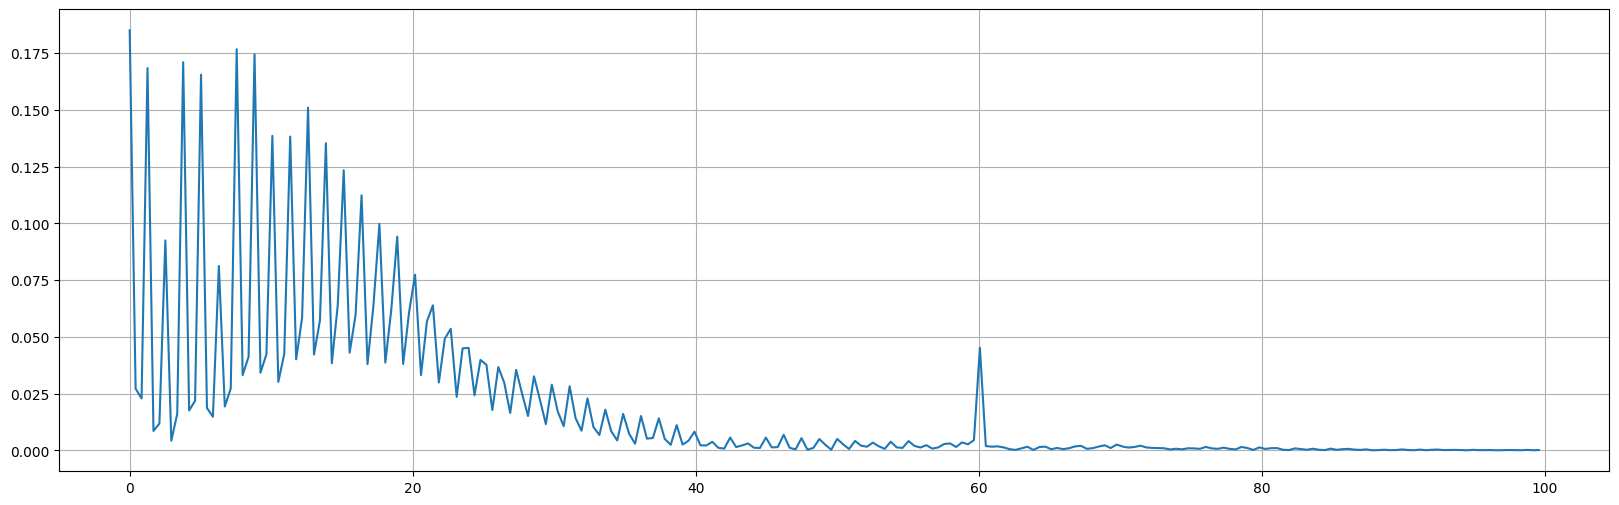

In [4]:
# convert to frequency domain
N = np.shape(ECG_data_1)[0] # Number of sample points
T = 1.0 / 200.0 # 1/fs
yf = fft(ECG_data_1)
xf = fftfreq(N, T)[:N//2]
plt.figure(figsize=(20, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

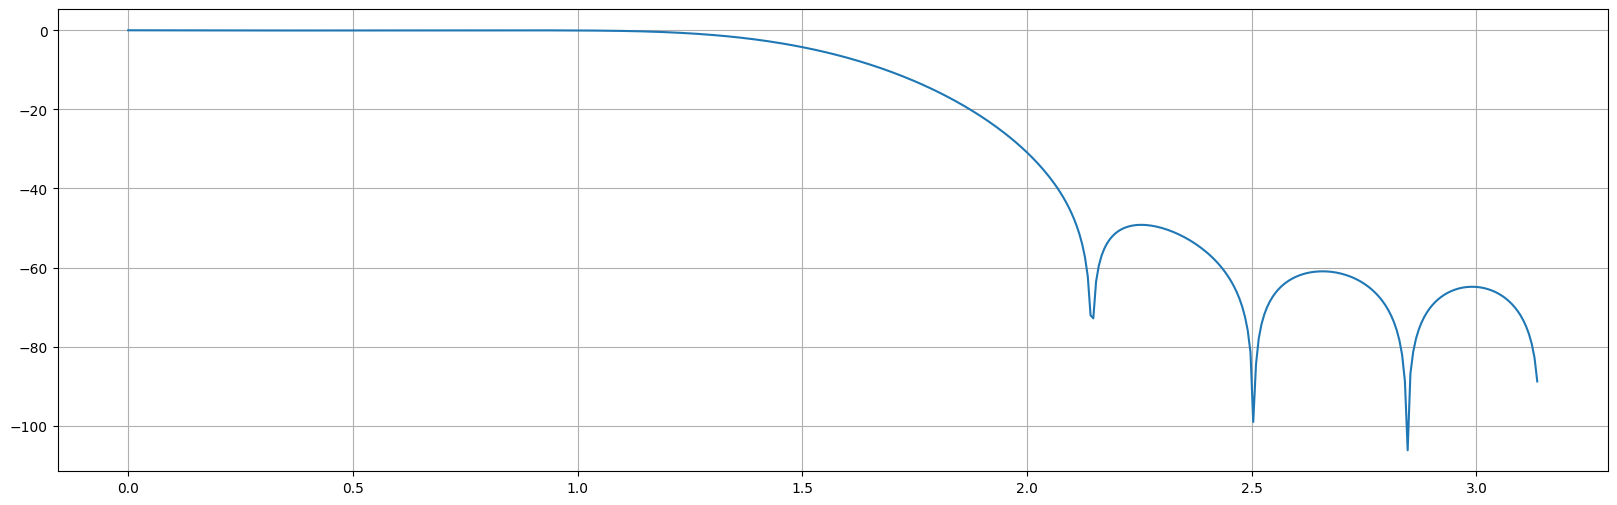

In [5]:
# Define FIR low pass filter.
def fir_low_pass_filter(data, cutoff, fs, order):
    # Calculate Nyquist frequency.
    nyq = fs / 2
    # Calculate FIR coefficients.
    b = signal.firwin(order, cutoff / nyq , window='hamming')
    # Draw the frequency response of the filter.
    w, h = signal.freqz(b)
    plt.figure(figsize=(20, 6))
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.grid()
    plt.show()
    # Apply filter to data.
    return signal.lfilter(b, 1, data)
filtered_ecg_1 = fir_low_pass_filter(ECG_data_1, 50 , 200, 20)

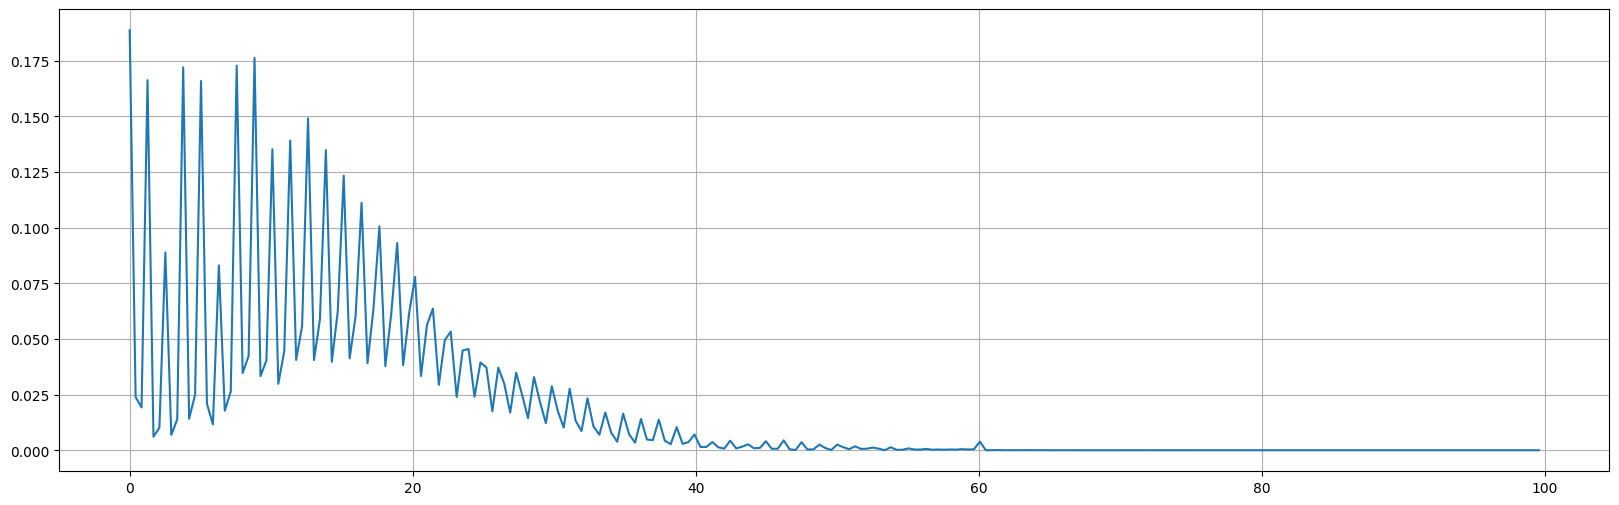

In [6]:
# convert to frequency domain
from scipy.fft import fft, fftfreq
N = np.shape(filtered_ecg_1)[0] # Number of sample points
T = 1.0 / 200.0 # 1/fs
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(filtered_ecg_1)
xf = fftfreq(N, T)[:N//2]
plt.figure(figsize=(20, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

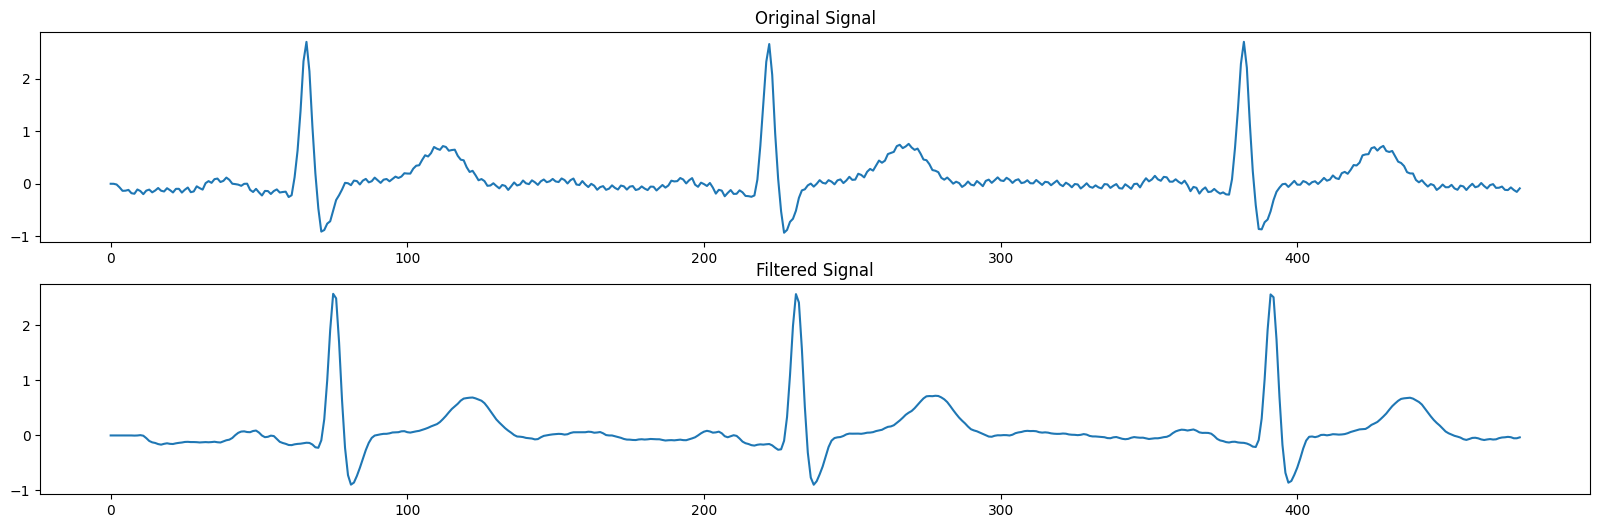

In [7]:
# draw the original signal vs filtered signal
plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
plt.plot(ECG_data_1)
plt.title('Original Signal')
plt.subplot(2, 1, 2)
plt.plot(filtered_ecg_1)
plt.title('Filtered Signal')
plt.show()


# Baseline Wandering

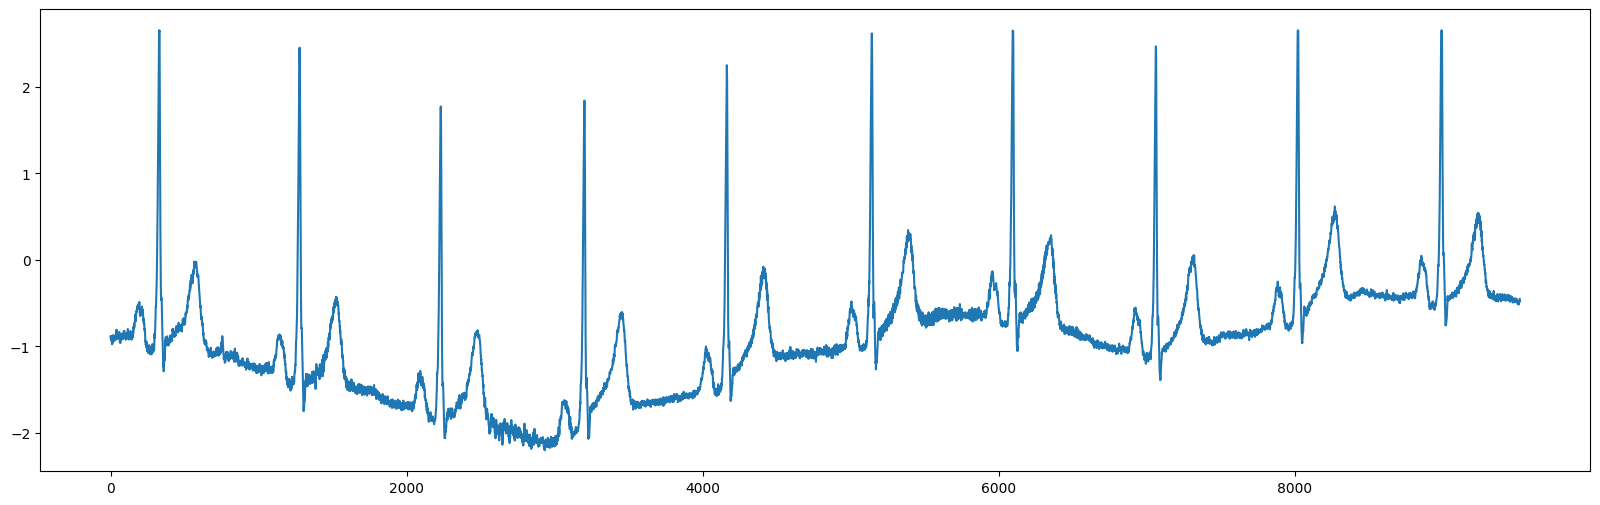

In [8]:
# Read Data from DAT file
file_path = '../Data/ECG2.dat'

# Initialize an empty list to store the read float data.
ECG_data_2 = []

# Open the DAT file and read its contents.
try:
    with open(file_path, 'r') as file:
        for line in file:
            values = line.strip().split()
            for value in values:
                try:
                    float_value = float(value)
                    ECG_data_2.append(float_value)
                except ValueError:
                    print(f"Skipping non-float value: {value}")

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
    exit()
ECG_data = np.array(ECG_data_2)
plt.figure(figsize=(20, 6))
plt.plot(ECG_data)
plt.show()

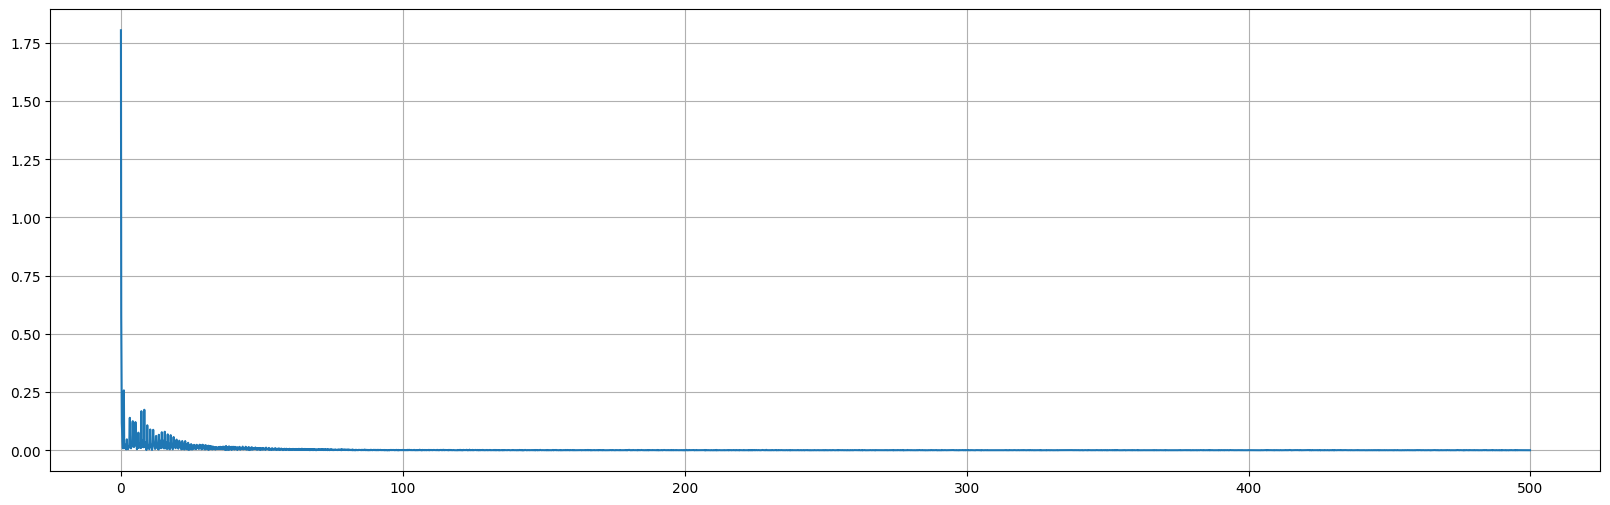

In [9]:
# convert to frequency domain
N = np.shape(ECG_data_2)[0] # Number of sample points
T = 1.0 / 1000.0 # 1/fs
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(ECG_data_2)
xf = fftfreq(N, T)[:N//2]
plt.figure(figsize=(20, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

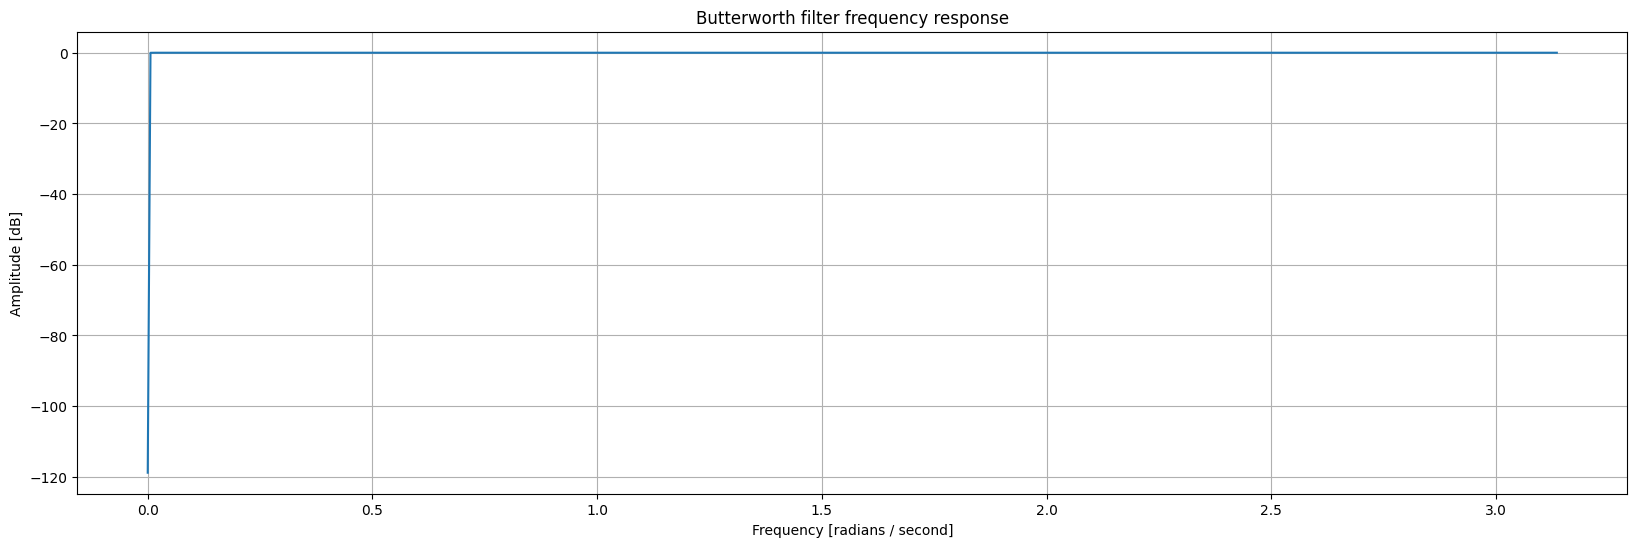

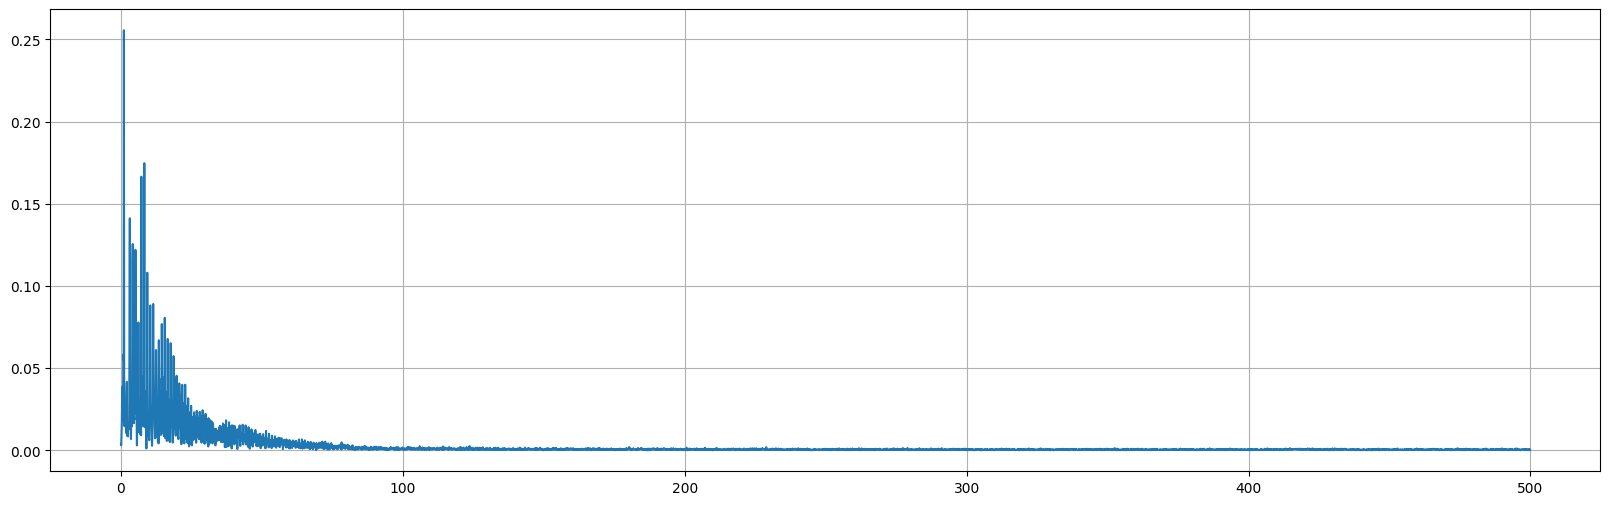

In [10]:
# implement a butterworth high pass filter
def butter_high_pass_filter(data, cutoff, fs, order):
    # Calculate Nyquist frequency.
    nyq = fs / 2
    # Calculate Butterworth filter coefficients.
    b, a = signal.butter(order, cutoff / nyq , btype='highpass')
    # Draw the frequency response of the filter.
    w, h = signal.freqz(b, a)
    plt.figure(figsize=(20, 6))
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.title('Butterworth filter frequency response')
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.grid()
    plt.show()
    # Apply filter to data.
    return signal.lfilter(b, a, data)

filtered_ecg_2 = butter_high_pass_filter(ECG_data_2,0.5, 1000, 4)


# convert to frequency domain
N = np.shape(filtered_ecg_2)[0] # Number of sample points
T = 1.0 / 1000.0 # 1/fs
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(filtered_ecg_2)
xf = fftfreq(N, T)[:N//2]
plt.figure(figsize=(20, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

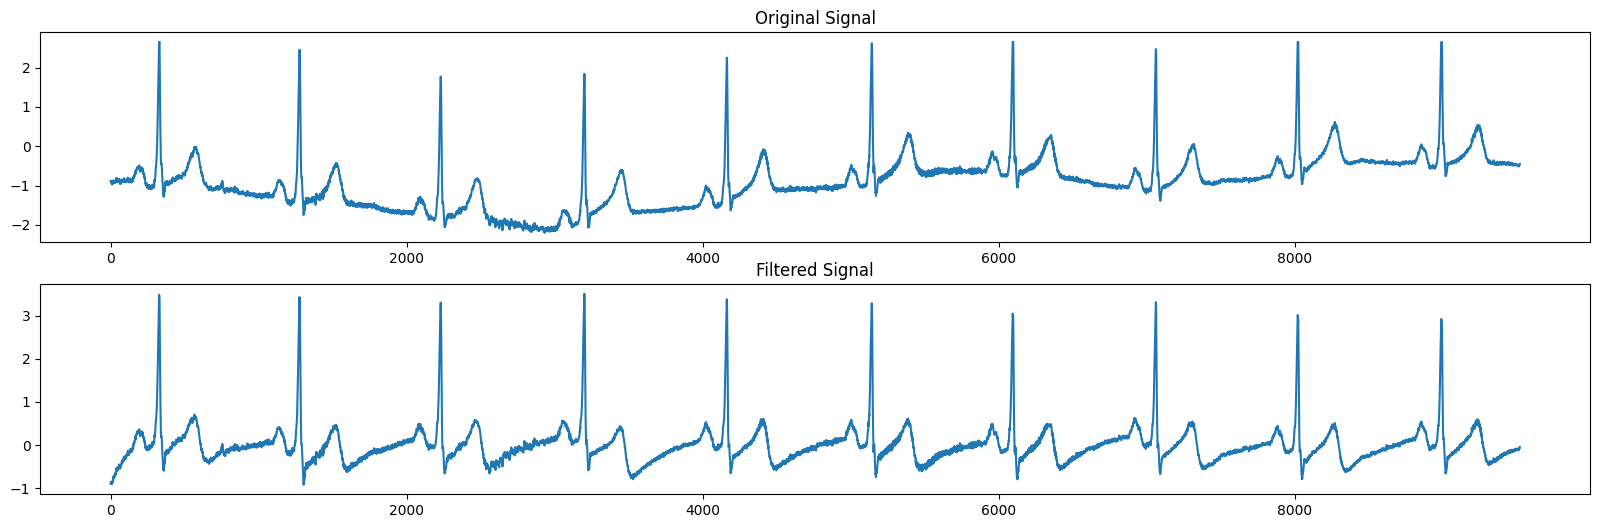

In [11]:
# plot the original signal vs filtered signal
plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
plt.plot(ECG_data_2)
plt.title('Original Signal')
plt.subplot(2, 1, 2)
plt.plot(filtered_ecg_2)
plt.title('Filtered Signal')
plt.show()

# Remove All noise

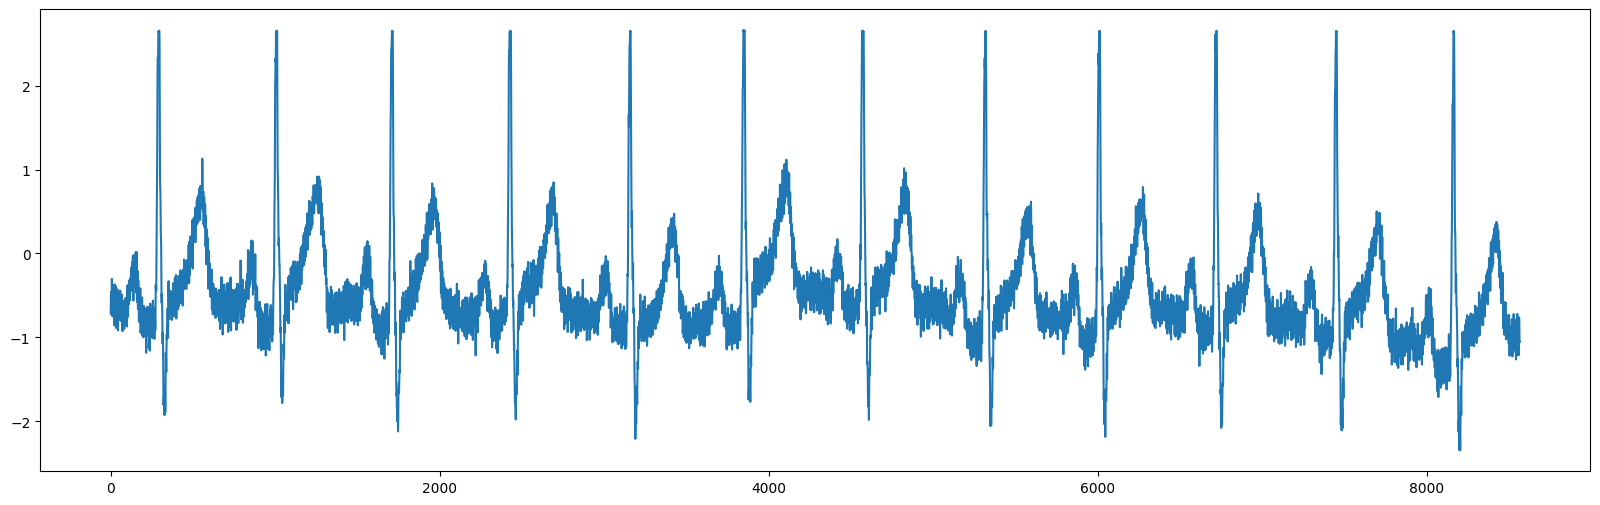

In [12]:
# Read Data from DAT file
file_path = '../Data/ECG3.dat'

# Initialize an empty list to store the read float data.
ECG_data_3 = []

# Open the DAT file and read its contents.
try:
    with open(file_path, 'r') as file:
        for line in file:
            values = line.strip().split()
            for value in values:
                try:
                    float_value = float(value)
                    ECG_data_3.append(float_value)
                except ValueError:
                    print(f"Skipping non-float value: {value}")

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
    exit()
ECG_data = np.array(ECG_data_3)
plt.figure(figsize=(20, 6))
plt.plot(ECG_data)
plt.show()

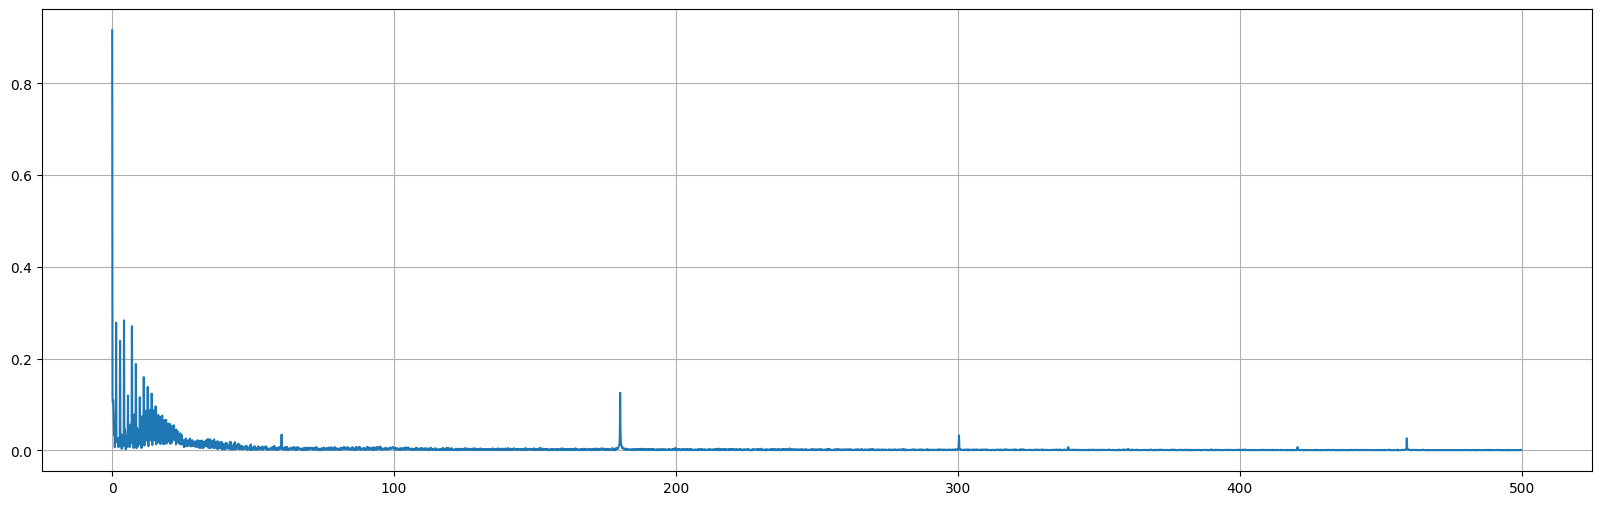

In [13]:
# convert to frequency domain
from scipy.fft import fft, fftfreq
# Number of sample points
N = np.shape(ECG_data_3)[0]
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(ECG_data_3)
xf = fftfreq(N, T)[:N//2]
plt.figure(figsize=(20, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

C:\Users\pahan\AppData\Local\Temp\ipykernel_24680\3282940745.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)))


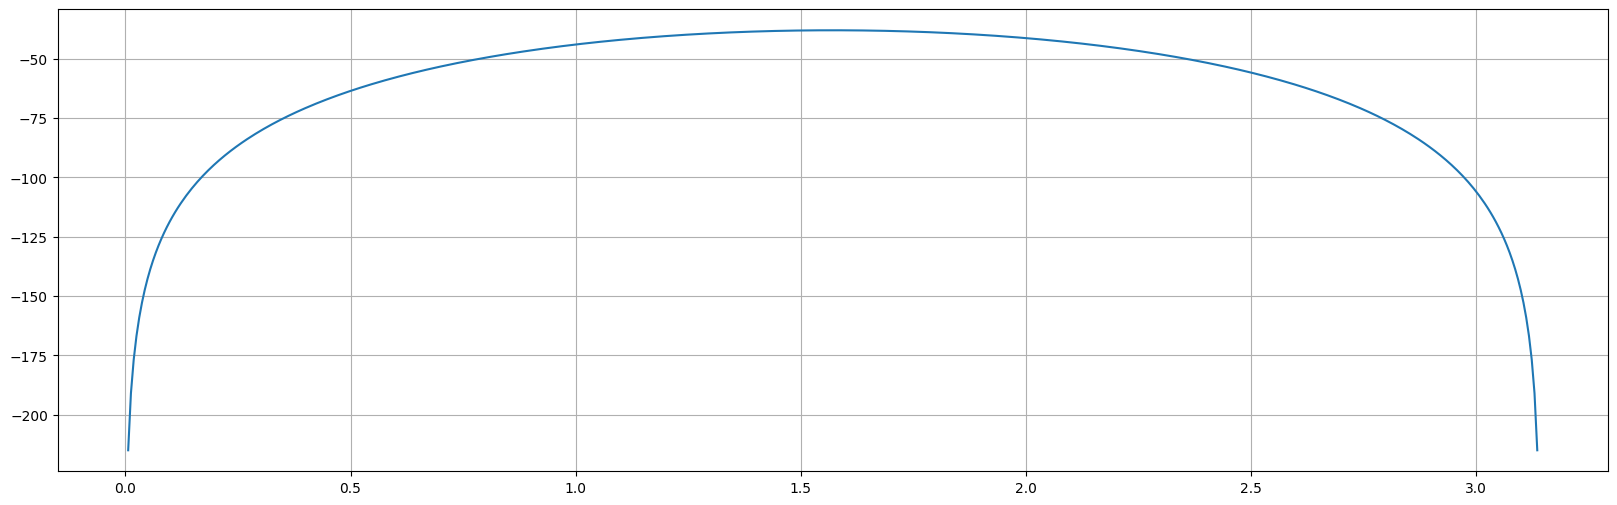

In [14]:
# Define butterworth band pass filter.

def butter_band_pass_filter(data, low_cutoff, high_cutoff, fs, order):
    nyq = fs / 2
    # Calculate Butterworth filter coefficients.
    b, a = signal.butter(order, [low_cutoff / nyq, high_cutoff / nyq], btype='bandpass')
    # Draw the frequency response of the filter.
    w, h = signal.freqz(b)
    plt.figure(figsize=(20, 6))
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.grid()
    plt.show()
    # Apply filter to data.
    return signal.lfilter(b, a, data)
    
    


filtered_ecg_3 = butter_band_pass_filter(ECG_data_3, 0.5, 60, 1000, 4)

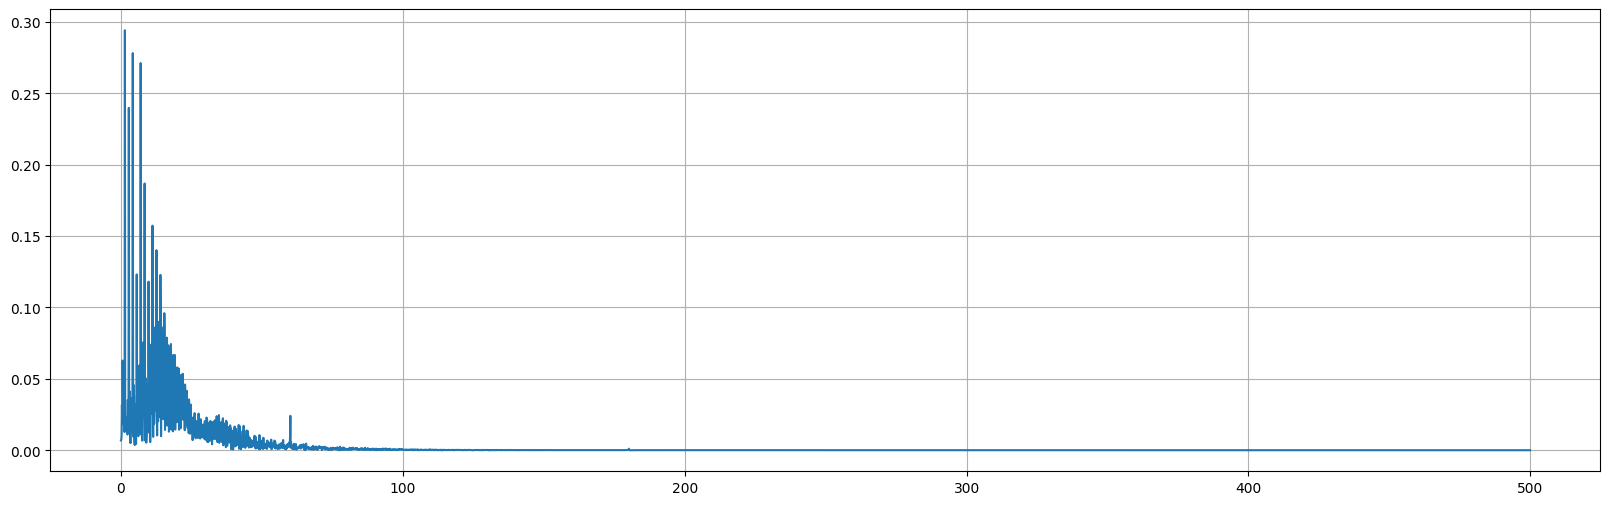

In [15]:
# convert to frequency domain
from scipy.fft import fft, fftfreq
N = np.shape(filtered_ecg_3)[0] # Number of sample points
T = 1.0 / 1000.0 # sample spacing
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(filtered_ecg_3)
xf = fftfreq(N, T)[:N//2]
plt.figure(figsize=(20, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()


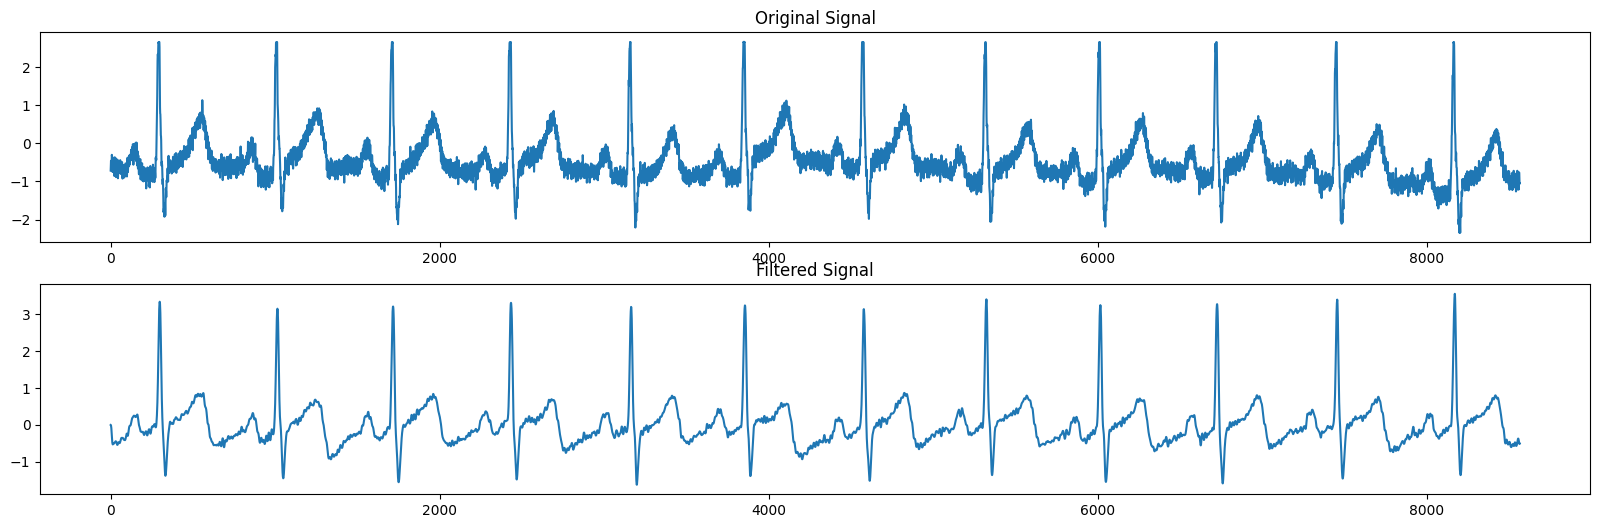

In [16]:
# plot the original signal vs filtered signal
plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
plt.plot(ECG_data_3)
plt.title('Original Signal')
plt.subplot(2, 1, 2)
plt.plot(filtered_ecg_3)
plt.title('Filtered Signal')
plt.show()


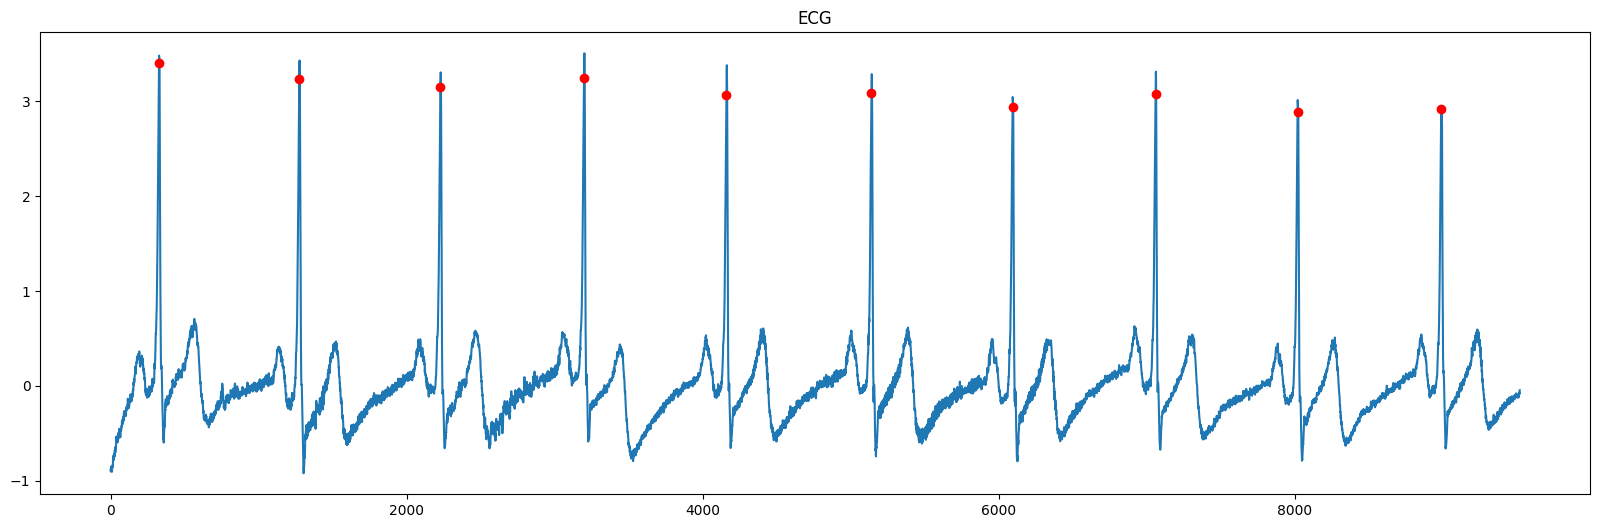

In [42]:

ecg_signal = filtered_ecg_2
fs = 1000

# detect R peaks
from biosppy.signals import ecg as biosppy_ecg
out = biosppy_ecg.ecg(signal=ecg_signal, sampling_rate=fs, show=False)  # rpeaks

# rpeaks
rpeaks = out['rpeaks']

# plot signal and detected R-peaks
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(ecg_signal)
plt.plot(rpeaks, ecg_signal[rpeaks], 'ro')
plt.title('ECG')
plt.show()



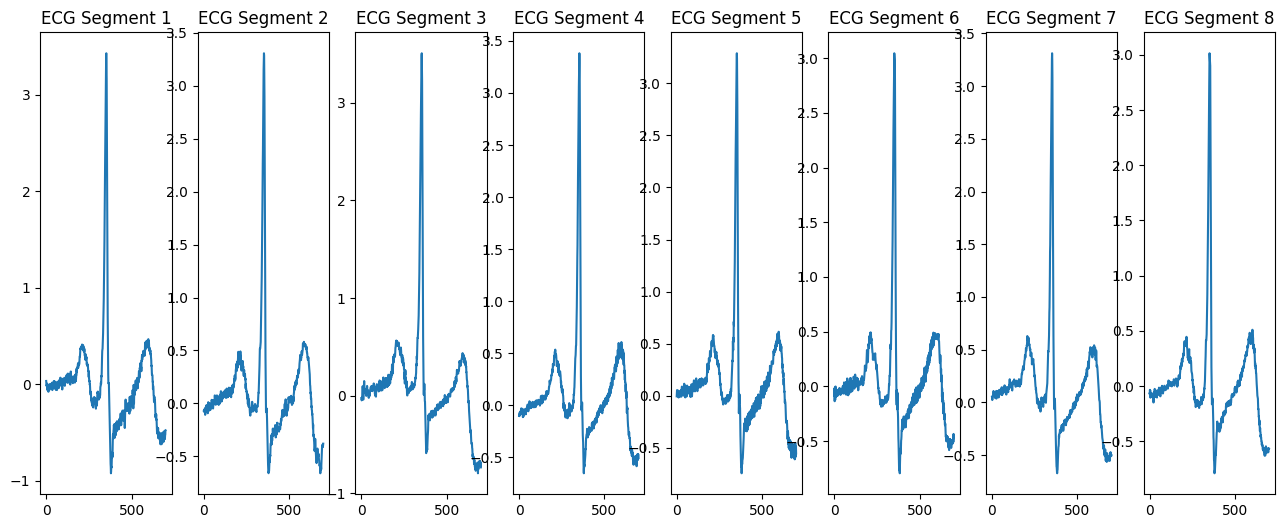

In [52]:
# Create a single figure for all the subplots
plt.figure(figsize=(20, 6))

for i in range(1, len(rpeaks) - 1):
    # Create a subplot for each segment
    plt.subplot(1, len(rpeaks), i + 1)
    plt.plot(ecg_signal[rpeaks[i] - 350:rpeaks[i] + 350])
    plt.title('ECG Segment {}'.format(i))

plt.show()
